<center>

# Program No. 2
</center>

### <strong> Objective: </strong> Identify the problem with single unit Perceptron. Classify using Or-, And and Xor-ed data and analyze the result.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


In [18]:
# Input features (X) and outputs (y) for AND, OR, XOR
X = np.array([[0,0], [0,1], [1,0], [1,1]])

y_and  = np.array([0, 0, 0, 1])
y_or   = np.array([0, 1, 1, 1])
y_xor  = np.array([0, 1, 1, 0])


In [19]:
def train_and_evaluate(X, y, gate_name):
    model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    model.fit(X, y)
    preds = model.predict(X)

    print(f"\n{gate_name} Gate")
    print("Predictions :", preds)
    print("Actual      :", y)
    print("Accuracy    :", accuracy_score(y, preds))

    return model


In [20]:
perceptron_and = train_and_evaluate(X, y_and, "AND")



AND Gate
Predictions : [0 0 0 1]
Actual      : [0 0 0 1]
Accuracy    : 1.0


In [21]:
perceptron_or = train_and_evaluate(X, y_or, "OR")



OR Gate
Predictions : [0 1 1 1]
Actual      : [0 1 1 1]
Accuracy    : 1.0


In [22]:
perceptron_xor = train_and_evaluate(X, y_xor, "XOR")



XOR Gate
Predictions : [0 0 0 0]
Actual      : [0 1 1 0]
Accuracy    : 0.5


In [23]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
    plt.show()


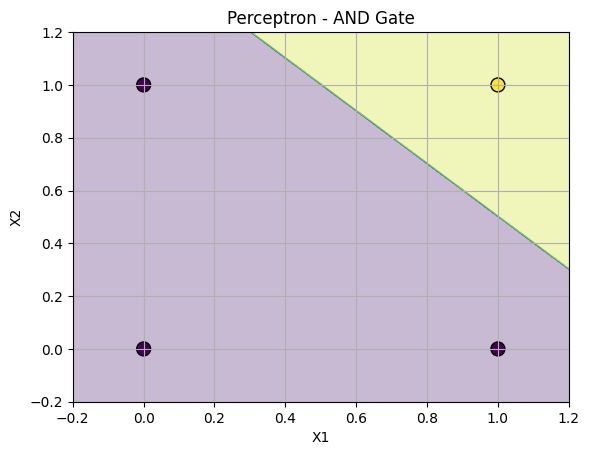

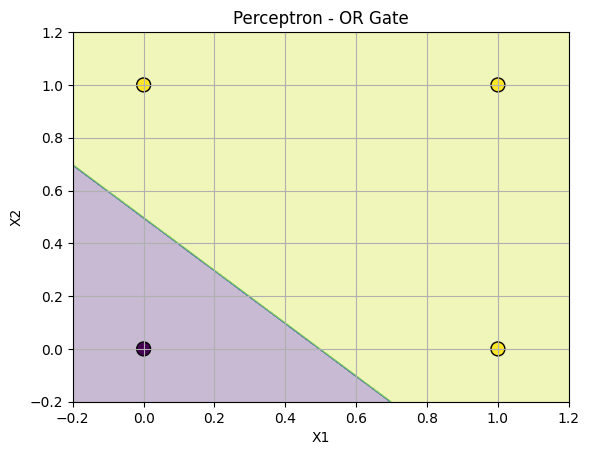

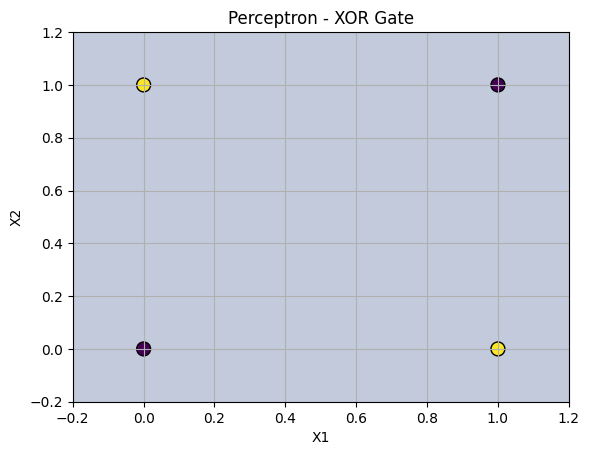

In [24]:
plot_decision_boundary(perceptron_and, X, y_and, "Perceptron - AND Gate")
plot_decision_boundary(perceptron_or, X, y_or, "Perceptron - OR Gate")
plot_decision_boundary(perceptron_xor, X, y_xor, "Perceptron - XOR Gate")


### Analysis:

<strong>Problem Identified:</strong> The single unit perceptron fails to learn the XOR function correctly.<br>
<strong>Reason:</strong> XOR is not linearly separable. A single perceptron can only create a linear decision boundary, but XOR requires a non-linear boundary.<br>
<strong>Solution:</strong> Use a multi-layer perceptron (neural network) to solve XOR.